<a href="https://colab.research.google.com/github/karan-abhinav/ANN/blob/main/Project_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
%matplotlib inline

# New section

In [ ]:
train = pd.read_csv('weldTrain.csv')
train.head()

,Id,Type,HighPD,ModeratePD,LowPD,SufficientDOP,InsufficientDOP,LargerAOF,ModerateAOF,LowerAOF,WBCALT90,WBCALTEQ90,WBCAGT90
0,1,"['LowPD', 'InsufficientDOP', 'LowerAOF', 'WBCA...",0,0,1,0,1,0,0,1,0,0,1
1,2,"['LowPD', 'InsufficientDOP', 'LowerAOF', 'WBCA...",0,0,1,0,1,0,0,1,0,0,1
2,3,"['LowPD', 'InsufficientDOP', 'LowerAOF', 'WBCA...",0,0,1,0,1,0,0,1,0,0,1
3,4,"['ModeratePD', 'SufficientDOP', 'LargerAOF', '...",0,1,0,1,0,1,0,0,0,1,0
4,5,"['ModeratePD', 'SufficientDOP', 'ModerateAOF',...",0,1,0,1,0,0,1,0,0,1,0


In [ ]:
train.columns
train.shape[0]

19

In [ ]:
 !unzip Images.zip

Archive:  Images.zip
replace Images/1.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [ ]:

train_image = []
for i in tqdm(range(train.shape[0])):
  img = image.load_img('Images/'+str(train['Id'][i])+'.png', target_size=(400,400,3))
  img = image.img_to_array(img)
  img = img/255
  train_image.append(img)
X = np.array(train_image)

100%|██████████| 19/19 [00:00<00:00, 123.41it/s]


In [ ]:
X.shape

(19, 400, 400, 3)

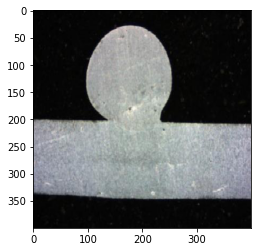

In [ ]:
plt.imshow(X[2])

In [ ]:
train['Type'][2]

"['LowPD', 'InsufficientDOP', 'LowerAOF', 'WBCAGT90']"

In [ ]:
y = np.array(train.drop(['Id', 'Type'],axis=1))
y.shape

(19, 11)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.1)

In [ ]:
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(5, 5), activation="relu", input_shape=(400,400,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(11, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 396, 396, 16)      1216      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 198, 198, 16)      0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 198, 198, 16)      0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 194, 194, 32)      12832     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 97, 97, 32)        0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 97, 97, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 93, 93, 64)       

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        'Images/'+str(train['Id'][i])+'.png',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 150x150
        batch_size=128,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow training images in batches of 128 using train_datagen generator
validation_generator = validation_datagen.flow_from_directory(
         'Images/'+str(train['Id'][i])+'.png',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 150x150
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

NotADirectoryError: ignored

In [ ]:
model.fit(X_train, y_train, epochs=75, validation_data=(X_test, y_test), batch_size=64)

Train on 17 samples, validate on 2 samples
Epoch 1/75
17/17 [==============================] - 5s 296ms/step - loss: 0.1545 - accuracy: 0.9251 - val_loss: 0.9493 - val_accuracy: 0.7273
Epoch 2/75
17/17 [==============================] - 5s 297ms/step - loss: 0.1868 - accuracy: 0.9251 - val_loss: 0.9680 - val_accuracy: 0.7273
Epoch 3/75
17/17 [==============================] - 5s 296ms/step - loss: 0.1468 - accuracy: 0.9465 - val_loss: 0.9918 - val_accuracy: 0.7273
Epoch 4/75
17/17 [==============================] - 5s 298ms/step - loss: 0.1136 - accuracy: 0.9412 - val_loss: 1.0167 - val_accuracy: 0.7273
Epoch 5/75
17/17 [==============================] - 5s 298ms/step - loss: 0.1060 - accuracy: 0.9412 - val_loss: 1.0534 - val_accuracy: 0.7273
Epoch 6/75
17/17 [==============================] - 5s 298ms/step - loss: 0.1293 - accuracy: 0.9358 - val_loss: 1.1033 - val_accuracy: 0.7273
Epoch 7/75
17/17 [==============================] - 5s 297ms/step - loss: 0.1013 - accuracy: 0.9412 - val

In [ ]:
img = image.load_img('Images/6.png',target_size=(400,400,3))
img = image.img_to_array(img)
img = img/255

SufficientDOP (0.996)
WBCALT90 (0.983)
LargerAOF (0.934)


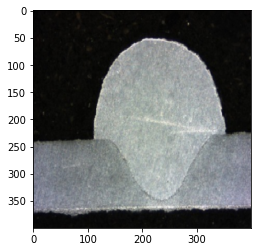

In [ ]:
classes = np.array(train.columns[2:])
proba = model.predict(img.reshape(1,400,400,3))
top_3 = np.argsort(proba[0])[:-4:-1]
for i in range(3):
    print("{}".format(classes[top_3[i]])+" ({:.3})".format(proba[0][top_3[i]]))
plt.imshow(img)